%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


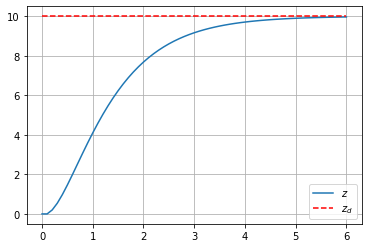

In [3]:
%pylab inline
def simulate(Δt, x, u):
    x += Δt * u
    return x
# mass and gravity
m, g = 1, 9.8
# z unit vector
e3 = np.array([0,0,1])

tf = 6.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
# Desired high
z_d = 10
vz_d = 0

# Gains
kp, kd = 2, 3

# Initial conditions
x = np.array([0,0,0, 0., 0., 0.])
dx = np.zeros(6)

x_log = [copy(x)]

for t in time[1:]:
    z = x[2]
    vz = x[5]
    
    # Total force 
    f_g = -m*g*e3
    
    u = kp*(z_d - z) + kd*(vz_d - vz) + g
    
    # Dynamics
    dx[:3] = x[3:]
    dx[3:] = f_g / m + u * e3
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    
x_log = np.array(x_log)

grid()
plot(time, x_log[:,2], label='$z$')
# desired
plot(time[[0,-1]], [z_d, z_d], 'r--', label='$z_d$')
legend()

AttributeError: 'tuple' object has no attribute 'canvas'

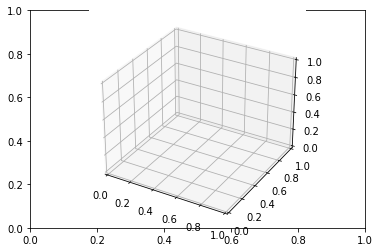

In [38]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig= plt.subplots()
ax = plt.axes(projection='3d')


def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--', linewidth=0.5)
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
        

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())

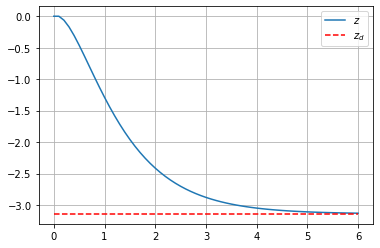

In [39]:
def simulate(Δt, x, dx):   
    x += Δt * dx
    return x
# z unit vector
e3 = np.array([0,0,1])

tf = 6.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
# Desired angle
θ_d = -pi
ω_d = 0

# Gains
kp, kd = 2, 3

# arm
l = 1
Iy = 1

# Initial conditions
x = np.array([0.,0.])
dx = np.zeros(2)

x_log = [copy(x)]
u_log = [[0,0]]

for t in time[1:]:
    θ = x[0]
    ω = x[1]
    
    # PD controller         
    a = kp*(θ_d - θ) + kd*(ω_d - ω) # dessired angular acceleration
    
    ## Torque
    τ = Iy * a
    # forces u=iA.w
    u = [-τ / (2*l), τ / (2*l)]
    # acceleration in the body frame
    a = np.dot([-l,l], u)
    # Convert acceleration to the world frame a=I.a
    
    
    # Dynamics
    dx[0] = x[1]
    dx[1] = a
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    u_log.append(copy(u))
    
x_log = array(x_log)
u_log = array(u_log)
grid()
plot(time, x_log[:,0], label='$z$')
# desired
plot(time[[0,-1]], [θ_d, θ_d], 'r--', label='$z_d$')
legend()

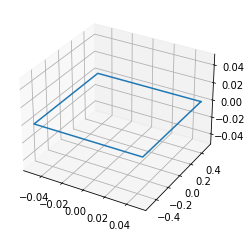

In [42]:
def box_points(w, l, h):
    points = np.zeros([5,3])
    points[0] = [ + w/2, 0, + h/2]
    points[1] = [ + w/2, 0, - h/2]
    points[2] = [ - w/2, 0, - h/2]
    points[3] = [ - w/2, 0, + h/2]
    points[4] = [ + w/2, 0, + h/2]
    return points

box = box_points(0.1, 0, 1)  
ax = plt.axes(projection='3d')
plot(box[:,0], box[:,2], box[:,1])
grid()

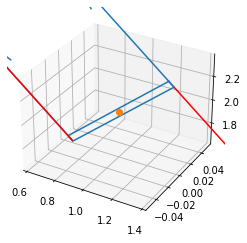

In [49]:
def box_se2(x, y, z, θ, u=[0,0], w=1, l=0, h=.05, ax = plt.axes(projection='3d')):
    points = box_points(w, l, h)
    # Rotation matrix
    R = [[cos(θ), 0, sin(θ)], 
         [0, 1, 0],
         [-sin(θ), 0, cos(θ)]]
    # Rotate
    points = [np.dot(R, p) for p in points]    
    points = array(points)
    
    # translate
    points[:,0] += x
    points[:,1] += y
    points[:,2] += z
    
    
    
    # propellers
    e1 = [1,0,0]    
    prop_x = array([sin(θ), sin(θ)])
    prop_y = array([0,0])
    prop_z = array([cos(θ), cos(θ)])
        
    # Plot propellers
    px = points[1:3,0]
    py = 0
    pz = points[1:3,2]
    ax.quiver(px, py, pz, prop_x, prop_y, prop_z)
    
    ax.plot(points[:,0],points[:,1], points[:,2] )
    # control input    
    ax.quiver(px, py, pz, u*prop_x, u*prop_y, u*prop_z, color='r')
    
 
x, y, z, θ = 1,0,2, -pi/4
box_se2(x, y, z, θ, [-3,3], w=1, l=0, h=0.05)

plot(x,y,z, 'o')
grid()


u_log = array(u_log)
for i in range(2):
    plot(time, u_log[:,i], label='$u_%d$'%(i+1))
plot(time, np.linalg.norm(u_log, axis=1), '--',label='$\| \mathbf{u}\|$')
grid()
legend()

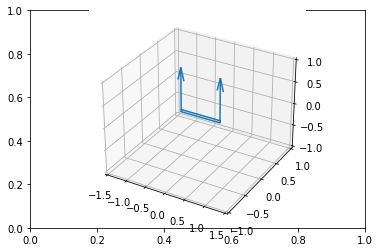

In [50]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()
ax = plt.axes(projection='3d')

def animate(t):
    ax.clear()       
        
    θ = x_log[t,0]
    u = u_log[t]
    # box points
    box = box_se2(0, 0, 0, θ, u, w=1, l=0, h=0.05, ax=ax)

 
    # Initial conditions
    #ax.plot(t, x_log[t,0],  'bo')
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1.,1.))
    ax.set_zlim((-1.,1.))
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())

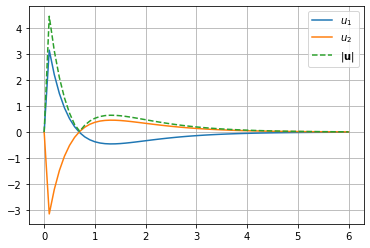

In [26]:

u_log = array(u_log)
for i in range(2):
    plot(time, u_log[:,i], label='$u_%d$'%(i+1))
plot(time, np.linalg.norm(u_log, axis=1), '--',label='$\| \mathbf{u}\|$')
grid()
legend()